In [1]:
import matplotlib.pyplot as plt
import numpy as np

import qutip as qt

In [2]:
# Hamiltonian parameters

# assume on site energy is 0

g = 10 * 2 * np.pi # 2pi MHz
U = -150 * 2 * np.pi # 2pi MHz

In [3]:
def create_annihilation_operators(num_qubits, num_levels):
    annihilation_operators = []
    for i in range(num_qubits):

        operator_list = [qt.qeye(num_levels)]*num_qubits
        operator_list[i] = qt.destroy(num_levels)

        ai = qt.tensor(operator_list)
        annihilation_operators.append(ai)
        
    return annihilation_operators

In [4]:
def sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators):  
    '''
    Finds the particle number of each state and separates the eigenenergies and eigenstates by their particle number
    '''
    
    N_op = 0
    for ai in annihilation_operators:
        N_op += ai.dag()*ai
        
    eigenenergies_particle_number = []
    eigenstates_particle_number = []

    for i in range(len(eigenenergies+1)):
        eigenenergies_particle_number.append([])
        eigenstates_particle_number.append([])


    for i in range(len(eigenstates)):
        eigenstate = eigenstates[i]
        eigenenergy = eigenenergies[i]

        particle_number = round(N_op.matrix_element(eigenstate, eigenstate).real)  
        
#         print(particle_number)

        eigenenergies_particle_number[particle_number].append(eigenenergy)
        eigenstates_particle_number[particle_number].append(eigenstate)
        
    return eigenenergies_particle_number, eigenstates_particle_number

# 1. Lattice Spectra

### 1.1 4Q Triangle Lattice

#### 1.1.1 Fixed Coupling

In [5]:
def generate_triangle_lattice_Hamiltonian(g, U, num_qubits, annihilation_operators):
    '''
      1---3---5
     / \ / \ /  ...
    0---2---4
    '''
    
    H = 0
    for i in range(num_qubits):
        ai = annihilation_operators[i]
        
        # on-site interaction term
        H += U/2*ai.dag()*ai*(ai.dag()*ai-1)
        for j in range(i+1, i+3):
            
            if j < num_qubits:

                aj = annihilation_operators[j]
                
                H += g*(ai.dag()*aj + aj.dag()*ai)  

                print(f'adding coupling bewteen ({i}, {j})')
            
    return H
    
    

In [6]:
# 4Q triangle lattice Hamiltonian

num_levels = 2
num_qubits = 8

# define operators
annihilation_operators = create_annihilation_operators(num_qubits, num_levels)

H = generate_triangle_lattice_Hamiltonian(g, U, num_qubits, annihilation_operators)
           
# print(H)

adding coupling bewteen (0, 1)
adding coupling bewteen (0, 2)
adding coupling bewteen (1, 2)
adding coupling bewteen (1, 3)
adding coupling bewteen (2, 3)
adding coupling bewteen (2, 4)
adding coupling bewteen (3, 4)
adding coupling bewteen (3, 5)
adding coupling bewteen (4, 5)
adding coupling bewteen (4, 6)
adding coupling bewteen (5, 6)
adding coupling bewteen (5, 7)
adding coupling bewteen (6, 7)


In [7]:
eigenenergies, eigenstates = H.eigenstates()
eigenenergies_particle_number, eigenstates_particle_number = sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators)

In [8]:
print(np.array(eigenenergies_particle_number[1])/2/np.pi)

[-19.25422918 -18.60805853  34.77352348]


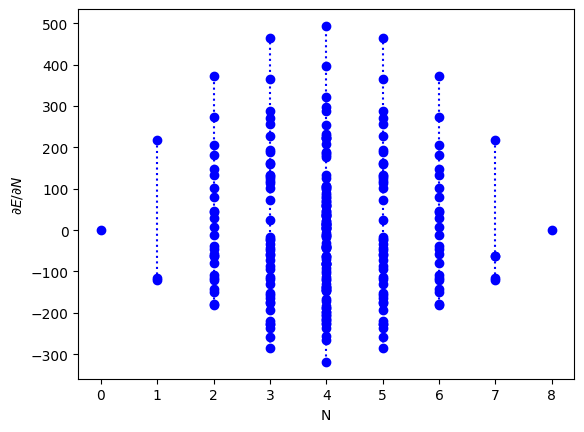

In [9]:
for i in range(len(eigenenergies_particle_number)):
    plt.plot([i]*len(eigenenergies_particle_number[i]), eigenenergies_particle_number[i], linestyle=':', marker='o', color='blue')
    
plt.xlabel('N')
plt.xticks(range(num_qubits+1))
plt.ylabel(r'$\partial E/\partial N$')
plt.show()

In [50]:
# 3Q triangle lattice Hamiltonian

num_levels = 2
num_qubits = 3

# define operators
annihilation_operators = create_annihilation_operators(num_qubits, num_levels)

H = generate_triangle_lattice_Hamiltonian(g, U, num_qubits, annihilation_operators)
           
# print(H)

In [51]:
eigenenergies, eigenstates = H.eigenstates()
eigenenergies_particle_number, eigenstates_particle_number = sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators)

In [52]:
print(eigenenergies_particle_number[1])

[-62.83185307179586, -62.83185307179579, 125.66370614359171]


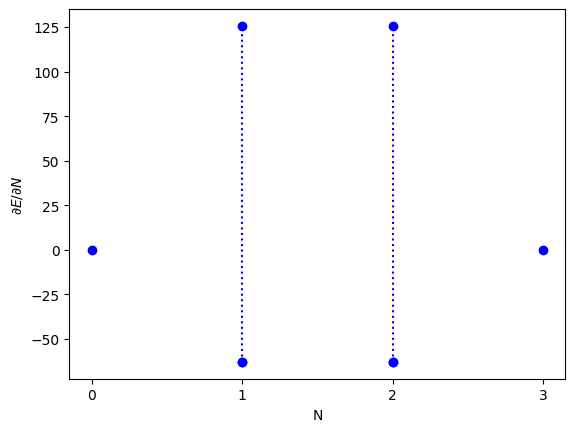

In [33]:
for i in range(len(eigenenergies_particle_number)):
    plt.plot([i]*len(eigenenergies_particle_number[i]), eigenenergies_particle_number[i], linestyle=':', marker='o', color='blue')
    
plt.xlabel('N')
plt.xticks(range(num_qubits+1))
plt.ylabel(r'$\partial E/\partial N$')
plt.show()

#### 1.1.2 Tunable Coupling

In [220]:
def generate_triangle_lattice_Hamiltonian_tunable_coupling(g, U, num_qubits, annihilation_operators):
    '''
      1-x-3-x-5
     / \ / \ /  ...
    0-x-2-x-4
    
    put tunable couplings on the legs
    
    for now only 3 qubits + 3 couplers is implemented
    
    '''
    
    detuning_1 = -2000*2*np.pi # MHz
    detuning_2 = -2000*2*np.pi # MHz
    detuning_3 = -2000*2*np.pi # MHz
    
    H = 0
#     for i in range(num_qubits):
        
#         ai = annihilation_operators[i]
        
#         # on-site interaction term
#         H += U/2*ai.dag()*ai*(ai.dag()*ai-1)
        

    a_q1, a_q2, a_q3, a_c1, a_c2, a_c3 = annihilation_operators
                
    # coupler energies
    H += detuning_1 * a_c1.dag()*a_c1
    H += detuning_3 * a_c2.dag()*a_c2
    H += detuning_2 * a_c3.dag()*a_c3
    
    # coupling
    g_leg_fixed = 10 * 2 * np.pi
    g_leg_fixed = 0
    g_leg_bare = 200 * 2 * np.pi
    
    # add fixed couplings
    H += g_leg_fixed*(a_q1.dag()*a_q2 + a_q2.dag()*a_q1)  
    H += g_leg_fixed*(a_q2.dag()*a_q3 + a_q3.dag()*a_q2)  
    H += g_leg_fixed*(a_q1.dag()*a_q3 + a_q3.dag()*a_q1)  
            
    # add tunable coupling
    H += g_leg_bare*(a_q1.dag()*a_c1 + a_c1.dag()*a_q1)  
    H += g_leg_bare*(a_q2.dag()*a_c1 + a_c1.dag()*a_q2)
    
    H += g_leg_bare*(a_q2.dag()*a_c2 + a_c2.dag()*a_q2)
    H += g_leg_bare*(a_q3.dag()*a_c2 + a_c2.dag()*a_q3)
    
    H += g_leg_bare*(a_q3.dag()*a_c3 + a_c3.dag()*a_q3)
    H += g_leg_bare*(a_q1.dag()*a_c3 + a_c3.dag()*a_q1)
    
    print((g_leg_bare**2/detuning_1 - g_leg_fixed)/2/np.pi)
      
    return H
    
    

In [221]:
# 3Q triangle lattice Hamiltonian with tunable coupling on one leg

num_levels = 2
num_qubits = 6

# define operators
annihilation_operators = create_annihilation_operators(num_qubits, num_levels)

H = generate_triangle_lattice_Hamiltonian_tunable_coupling(g, U, num_qubits, annihilation_operators)
           
# print(H)

-20.000000000000004


In [222]:
eigenenergies, eigenstates = H.eigenstates()
eigenenergies_particle_number, eigenstates_particle_number = sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators)

In [223]:
print(np.array(eigenenergies_particle_number[1])/2/np.pi)

[-2077.03296143 -2019.80390272 -2019.80390272    19.80390272
    19.80390272    77.03296143]


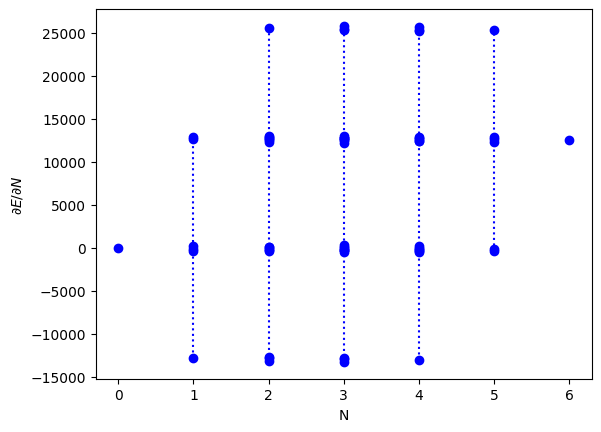

In [218]:
for i in range(len(eigenenergies_particle_number)):
    plt.plot([i]*len(eigenenergies_particle_number[i]), eigenenergies_particle_number[i], linestyle=':', marker='o', color='blue')
    
plt.xlabel('N')
plt.xticks(range(num_qubits+1))
plt.ylabel(r'$\partial E/\partial N$')
plt.show()

### 1.2 1D Chain Paper

In [19]:
def generate_1D_chain_Hamiltonian(g, U, num_qubits, annihilation_operators):
    '''
    0 - 1 - 2 - 3 - ...
    '''
    
    H = 0
    for i in range(num_qubits):
        ai = annihilation_operators[i]
        
        # on-site interaction term
        H += U/2*ai.dag()*ai*(ai.dag()*ai-1)
         
        if i < num_qubits - 1:

            aj = annihilation_operators[i+1]
            H += g*(ai.dag()*aj + aj.dag()*ai)  

            print(f'adding coupling bewteen ({i}, {i+1})')
            
    return H
    
    

In [20]:
# 1D chain lattice Hamiltonian

num_levels = 2
num_qubits = 4

# define operators
annihilation_operators = create_annihilation_operators(num_qubits, num_levels)

H_1D_chain = generate_1D_chain_Hamiltonian(g, U, num_qubits, annihilation_operators)
           
# print(H)

adding coupling bewteen (0, 1)
adding coupling bewteen (1, 2)
adding coupling bewteen (2, 3)
adding coupling bewteen (3, 4)
adding coupling bewteen (4, 5)


In [21]:
eigenenergies, eigenstates = H_1D_chain.eigenstates()
eigenenergies_particle_number, eigenstates_particle_number = sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators)


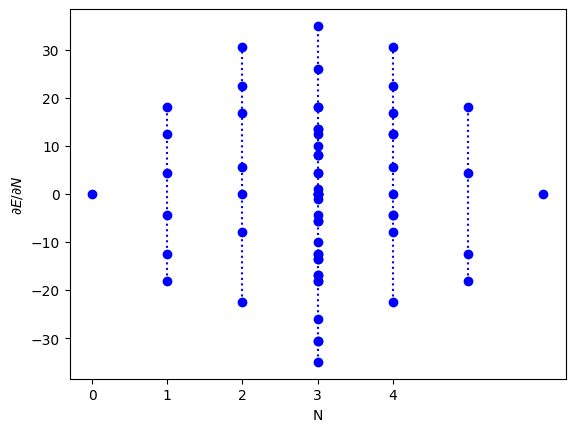

In [27]:
for i in range(len(eigenenergies_particle_number)):
    plt.plot([i]*len(eigenenergies_particle_number[i]), np.array(eigenenergies_particle_number[i])/(2*np.pi), linestyle=':', marker='o', color='blue')
    
plt.xlabel('N')
plt.xticks(range(num_qubits+1))
plt.ylabel(r'$\partial E/\partial N$')
plt.show()


In [161]:
# plot eigenstates

# 2. Initialization and Dynamics

Following https://arxiv.org/pdf/2403.11967

### 2.1 1D Chain Paper

In [24]:
# 1D chain lattice Hamiltonian from paper

num_levels = 2
num_qubits = 4

g = 6 * 2 * np.pi # 2pi MHz
U = -246 * 2 * np.pi # 2pi MHz

# define operators
annihilation_operators = create_annihilation_operators(num_qubits, num_levels)

H_1D_chain_paper = generate_1D_chain_Hamiltonian(g, U, num_qubits, annihilation_operators)
           
# print(H)

adding coupling bewteen (0, 1)
adding coupling bewteen (1, 2)
adding coupling bewteen (2, 3)


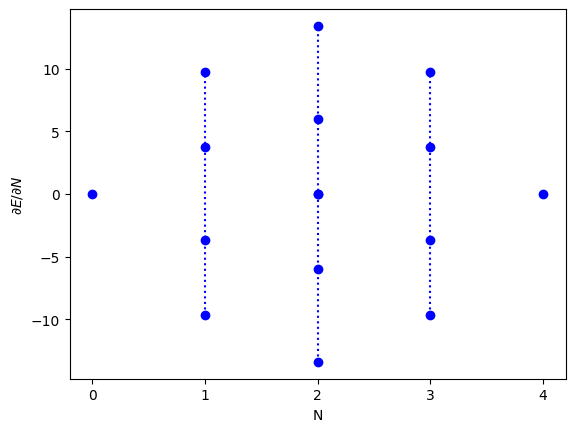

In [28]:
# bare spectrum

eigenenergies, eigenstates = H_1D_chain_paper.eigenstates()
eigenenergies_particle_number, eigenstates_particle_number = sort_by_number_particle(eigenenergies, eigenstates, annihilation_operators)


for i in range(len(eigenenergies_particle_number)):
    plt.plot([i]*len(eigenenergies_particle_number[i]), np.array(eigenenergies_particle_number[i])/(2*np.pi), linestyle=':', marker='o', color='blue')
    
plt.xlabel('N')
plt.xticks(range(num_qubits+1))
plt.ylabel(r'$\partial E/\partial N$')
plt.show()

#### 2.1.1 Two Qubit Current

In [325]:
times = np.linspace(0, 0.1, 101)

theta_q2 = 127/180 * np.pi
theta_q3 = 90/180 * np.pi

ket0 = qt.basis(num_levels, 0)
ket1 = qt.basis(num_levels, 1)

psi0_q2 = np.cos(theta_q2/2)*ket0 + np.sin(theta_q2/2)*ket1
psi0_q3 = np.cos(theta_q3/2)*ket0 + np.sin(theta_q3/2)*ket1

psi0 = qt.tensor([ket0, psi0_q2, psi0_q3, ket0])

e_ops = []
for i in range(num_qubits):
    ai = annihilation_operators[i]
    e_ops.append(ai.dag()*ai)
e_ops.append(global_energy_operator)

In [334]:
a1 = annihilation_operators[0]
a2 = annihilation_operators[1]
a3 = annihilation_operators[2]
a4 = annihilation_operators[3]

H_1D_chain_paper_two_qubit_current = H_1D_chain_paper - g*(a1.dag()*a2 + a2.dag()*a1 + a3.dag()*a4 + a4.dag()*a3)

result = qt.sesolve(H_1D_chain_paper_two_qubit_current, psi0, times, e_ops=e_ops)

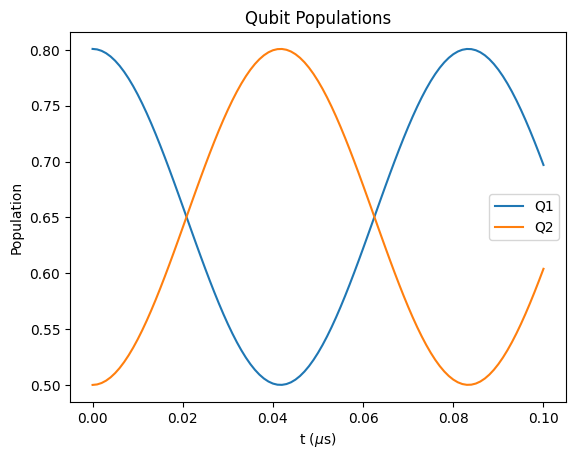

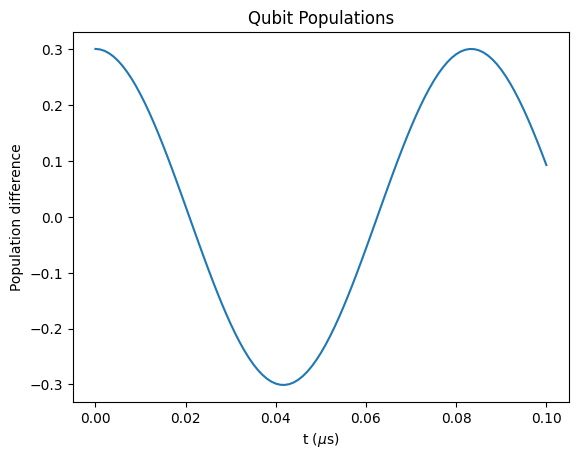

In [335]:


for i in range(num_qubits):
    if i in [1, 2]:
        plt.plot(times, result.expect[i], label=f'Q{i}')
    
plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.title('Qubit Populations')

plt.legend()
plt.show()

population_difference = result.expect[1] - result.expect[2]
plt.plot(times, population_difference)


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population difference')

plt.title('Qubit Populations')

plt.show()


#### 2.1.2 Plot Ramp

In [186]:
def Omega_t(t, args):
#     t in units of us
    Omega_0 = args['Omega_0']
    detuning_ramp_time = args['detuning_ramp_time']
    drive_ramp_time = args['drive_ramp_time']
    if t <= 0:
        # start at 0
        return 0
    elif t <= drive_ramp_time:
        # ramp up
        return t/drive_ramp_time * Omega_0
    elif t <= drive_ramp_time + detuning_ramp_time:
        # constant
        return Omega_0
    elif t <= detuning_ramp_time + 2*drive_ramp_time:
        # ramp down
        return Omega_0*(1 - (t - detuning_ramp_time - drive_ramp_time)/drive_ramp_time)
    else:
        # end at 0
        return 0

In [187]:
def Delta_t(t, args):
    # t in units of us
    Delta_0 = args['Delta_0']
    drive_ramp_time = args['drive_ramp_time']
    detuning_ramp_time = args['detuning_ramp_time']
    detuning_ramp_rate = args['detuning_ramp_rate']
    if t <= drive_ramp_time:
        # start at Delta_0
        return Delta_0
    elif t <= drive_ramp_time + detuning_ramp_time:
        # ramp down
        return Delta_0 + (t - drive_ramp_time)*detuning_ramp_rate
    else:
        # end at 0
        return Delta_0 + detuning_ramp_time*detuning_ramp_rate
    

In [188]:
def drive_coeff(t, args):
    Omega_0 = args['Omega_0']
    Delta_0 = args['Delta_0']
    detuning_ramp_time = args['detuning_ramp_time']
    drive_ramp_time = args['drive_ramp_time']
    detuning_ramp_rate = args['detuning_ramp_rate']
    
    Omega = Omega_t(t, args)
    Delta = Delta_t(t, args)
    
    return Omega*np.exp(-1j *Delta*t)

In [189]:
# define ramp parameters

Omega_0 = 4.2 * 2*np.pi # 2pi MHz
Delta_0 = 30 * 2*np.pi # 2pi MHz

drive_ramp_time = 0.3 # us
detuning_ramp_rate = -80 * 2*np.pi # 2pi MHz / us

detuning_ramp_time = 0.6 # us


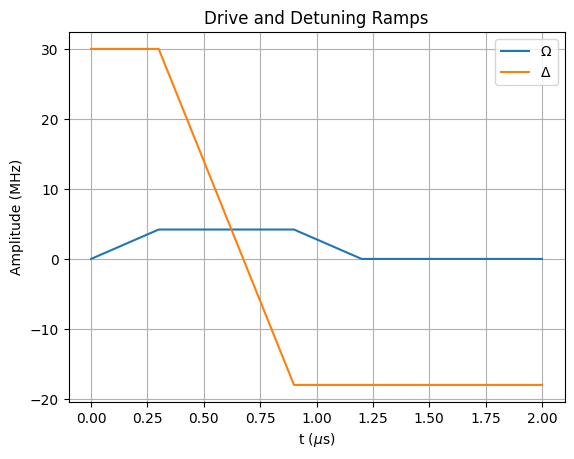

In [190]:
# plot ramps

times = np.linspace(0, 2, 101)

args = {'Omega_0': Omega_0, 'Delta_0': Delta_0, 'detuning_ramp_time': detuning_ramp_time, 'drive_ramp_time': drive_ramp_time, 'detuning_ramp_rate': detuning_ramp_rate}

Omega_ramp = np.zeros(times.shape)
Delta_ramp = np.zeros(times.shape)

for i in range(len(times)):
    Omega_ramp[i] = Omega_t(times[i], args)
    Delta_ramp[i] = Delta_t(times[i], args)

plt.plot(times, Omega_ramp/(2*np.pi), label='$\Omega$')
plt.plot(times, Delta_ramp/(2*np.pi), label='$\Delta$')

plt.xlabel('t ($\mu$s)')
plt.ylabel('Amplitude (MHz)')

plt.title('Drive and Detuning Ramps')

plt.legend()
plt.grid()
plt.show()

In [220]:
### qutip dynamics

# add energy shift due to detuned drive

for i in range(num_qubits):
        ai = annihilation_operators[i]
        
        # on-site interaction term
        H += U/2*ai.dag()*ai*(ai.dag()*ai-1)

    
global_energy_operator = 0
for i in range(num_qubits):
    ai = annihilation_operators[i]
    global_energy_operator += ai.dag()*ai

# global_drive_operator = qt.tensor([qt.sigmax()] * num_qubits)
global_drive_operator = 0
for i in range(num_qubits):
    ai = annihilation_operators[i]
    global_drive_operator += ai + ai.dag()
    
negative_Delta_t = lambda t, args: -Delta_t(t, args)

H_1D_chain_paper_time_dep = [H_1D_chain_paper, [global_energy_operator, negative_Delta_t], [global_drive_operator, Omega_t]]




In [221]:
times = np.linspace(0, 2, 1001)
psi0 = qt.basis([num_levels]*num_qubits)

e_ops = []
for i in range(num_qubits):
    ai = annihilation_operators[i]
    e_ops.append(ai.dag()*ai)
e_ops.append(global_energy_operator)
    
args['detuning_ramp_time'] = 0.3
print((Delta_0 + args['detuning_ramp_time']*detuning_ramp_rate)/(2*np.pi))
result = qt.sesolve(H_1D_chain_paper_time_dep, psi0, times, e_ops=e_ops, args=args)

5.999999999999997


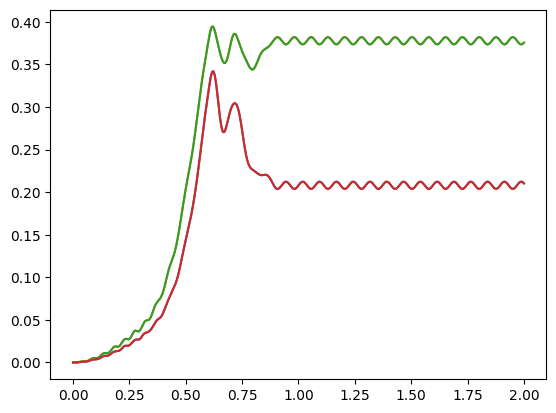

In [222]:
for i in range(num_qubits):
    plt.plot(times, result.expect[i])

#### 2.1.3 Sweep Detuning Ramp Time

In [229]:
detuning_ramp_times = np.linspace(0, 0.8, 65)
final_deltas = -(Delta_0 + detuning_ramp_times*detuning_ramp_rate)/(2*np.pi)
print(detuning_ramp_times)
print(final_deltas)

args = {'Omega_0': Omega_0, 'Delta_0': Delta_0, 'detuning_ramp_time': detuning_ramp_time, 'drive_ramp_time': drive_ramp_time, 'detuning_ramp_rate': detuning_ramp_rate}


[0.     0.0125 0.025  0.0375 0.05   0.0625 0.075  0.0875 0.1    0.1125
 0.125  0.1375 0.15   0.1625 0.175  0.1875 0.2    0.2125 0.225  0.2375
 0.25   0.2625 0.275  0.2875 0.3    0.3125 0.325  0.3375 0.35   0.3625
 0.375  0.3875 0.4    0.4125 0.425  0.4375 0.45   0.4625 0.475  0.4875
 0.5    0.5125 0.525  0.5375 0.55   0.5625 0.575  0.5875 0.6    0.6125
 0.625  0.6375 0.65   0.6625 0.675  0.6875 0.7    0.7125 0.725  0.7375
 0.75   0.7625 0.775  0.7875 0.8   ]
[-30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19. -18. -17.
 -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.  -4.  -3.
  -2.  -1.  -0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.
  12.  13.  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.
  26.  27.  28.  29.  30.  31.  32.  33.  34.]


In [235]:
convert_ramp_time_to_detuning_MHz = lambda x: -(Delta_0 + x*detuning_ramp_rate)/(2*np.pi)

convert_detuning_MHz_to_ramp_time = lambda x: (-x*(2*np.pi) - Delta_0)/detuning_ramp_rate

In [260]:

measure_time = 2*drive_ramp_time + detuning_ramp_time
beam_splitter_time = measure_time + np.pi/(4*g)

times = np.linspace(0, measure_time, 101)
times = np.concatenate((times, [beam_splitter_time]))

psi0 = qt.basis([num_levels]*num_qubits)
e_ops = []
for i in range(num_qubits):
    ai = annihilation_operators[i]
    e_ops.append(ai.dag()*ai)
    
population_data = np.zeros((num_qubits, len(detuning_ramp_times)))
beam_splitter_population_data = np.zeros((num_qubits, len(detuning_ramp_times)))

for i in range(len(detuning_ramp_times)):
    
    args['detuning_ramp_time'] = detuning_ramp_times[i]
    result = qt.sesolve(H_1D_chain_paper_time_dep, psi0, times, e_ops=e_ops, args=args)
    
    for j in range(num_qubits):
        population_data[j,i] = result.expect[j][-2]
        beam_splitter_population_data[j,i] = result.expect[j][-1]
    
    

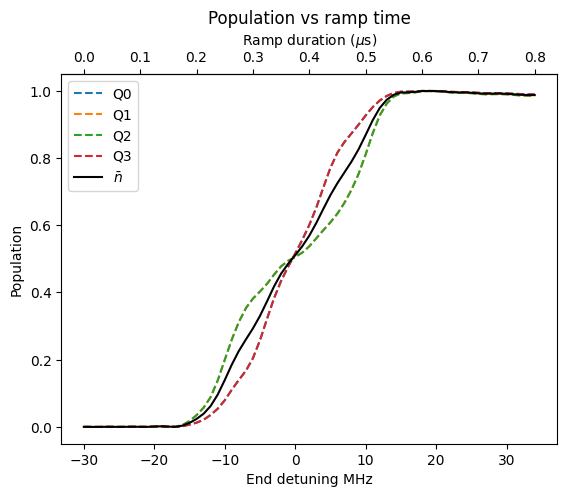

In [280]:
fig, ax = plt.subplots()

for i in range(num_qubits):
    plt.plot(final_deltas, population_data[i,:], linestyle='dashed', label=f'Q{i}')
    
average_population = np.sum(population_data, 0)/num_qubits
    
plt.plot(final_deltas, average_population, color='black', label=r'$\bar{n}$')
    
    
plt.xlabel('End detuning MHz')
plt.ylabel('Population')

secax = ax.secondary_xaxis('top', functions=(convert_detuning_MHz_to_ramp_time, convert_ramp_time_to_detuning_MHz))
secax.set_xlabel('Ramp duration ($\mu$s)')

plt.title('Population vs ramp time')

plt.legend()

plt.show()

#### 2.1.4 Current Statistics

In [283]:
current_q1_q2 = g*(beam_splitter_population_data[2,:] - beam_splitter_population_data[1,:])

In [284]:
# current eigenstates
current_q1_q2_statistics = np.zeros((len(detuning_ramp_times), 5))

for i in range(len(detuning_ramp_times)):
    
    p_1_q2 = beam_splitter_population_data[1,i]
    p_1_q3 = beam_splitter_population_data[2,i]
    
    p_00 = (1-p_1_q2)*(1-p_1_q3)
    p_01 = (1-p_1_q2)*p_1_q3
    p_10 = p_1_q2*(1-p_1_q3)
    p_11 = p_1_q2*p_1_q3
    
    p_minus_2J = p_11/2
    p_minus_J = p_10
    p_0J = p_00
    p_plus_J = p_01
    p_plus_2J = p_11/2    
    
    current_q1_q2_statistics[i,0] = p_minus_2J
    current_q1_q2_statistics[i,1] = p_minus_J
    current_q1_q2_statistics[i,2] = p_0J
    current_q1_q2_statistics[i,3] = p_plus_J
    current_q1_q2_statistics[i,4] = p_plus_2J

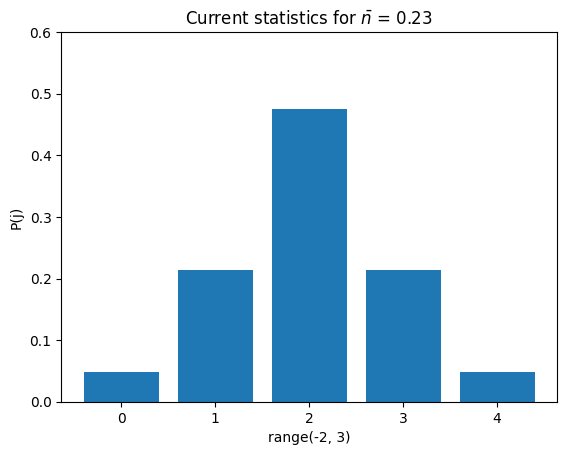

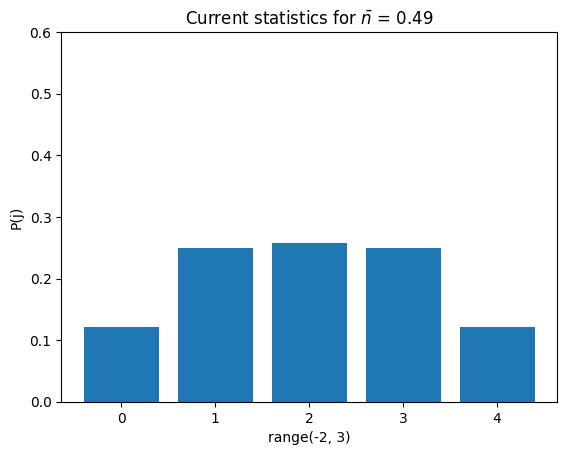

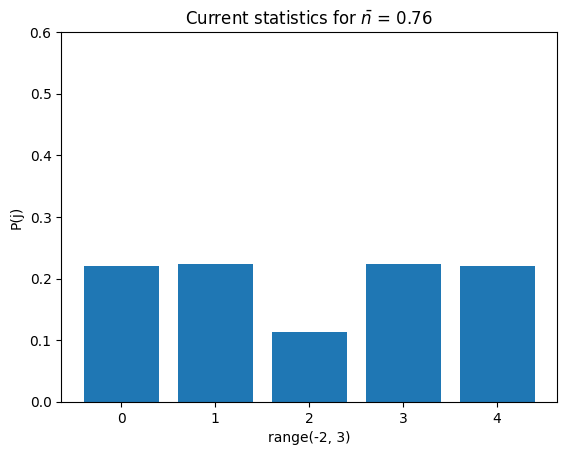

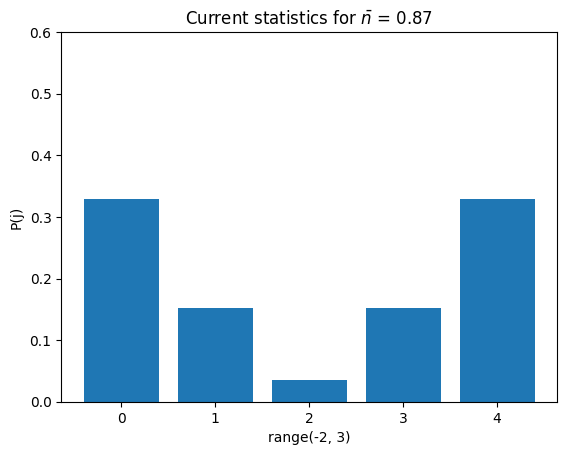

In [306]:

for i in range(len(detuning_ramp_times)):
    if i in [22, 29, 37, 40]:
        n_bar = average_population[i]
        
        plt.bar(range(5), current_q1_q2_statistics[i,:])
        
        plt.xlabel(range(-2,3))
        plt.ylabel('P(j)')
        
        plt.ylim(0, 0.6)
        
        plt.title(f'Current statistics for $\\bar{{n}}$ = {round(n_bar, 2)}')
        
        plt.show()

## 2.2 1D Chain Current Dynamics

Initialize one qubit on edge of chain and see how their current measurement evolves in time.

In [371]:
times = np.linspace(0, 1, 1001)

ket0 = qt.basis(num_levels, 0)
ket1 = qt.basis(num_levels, 1)

psi0 = qt.tensor([ket1, ket0, ket0, ket0])

e_ops = []
for i in range(num_qubits):
    ai = annihilation_operators[i]
    e_ops.append(ai.dag()*ai)
e_ops.append(global_energy_operator)

In [372]:
result = qt.sesolve(H_1D_chain_paper, psi0, times, e_ops=e_ops)

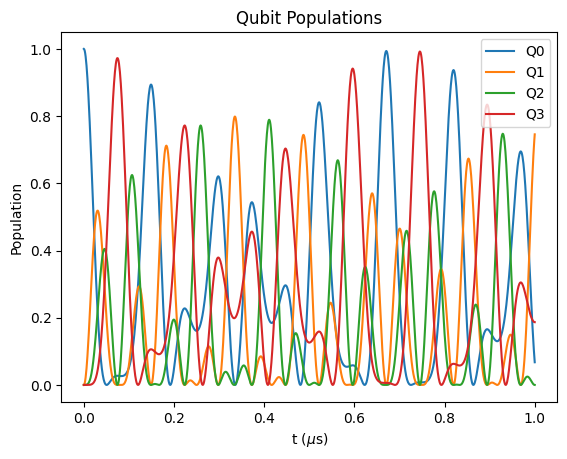

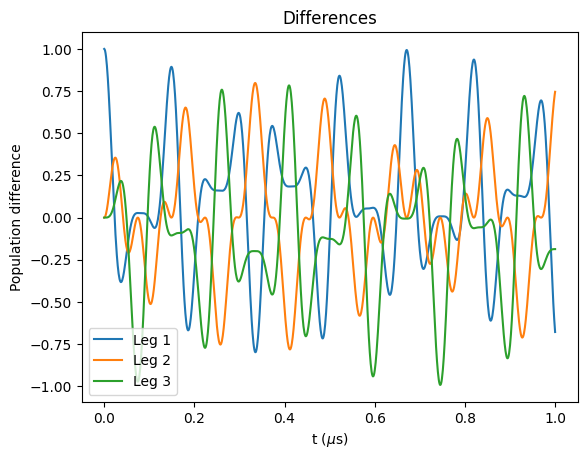

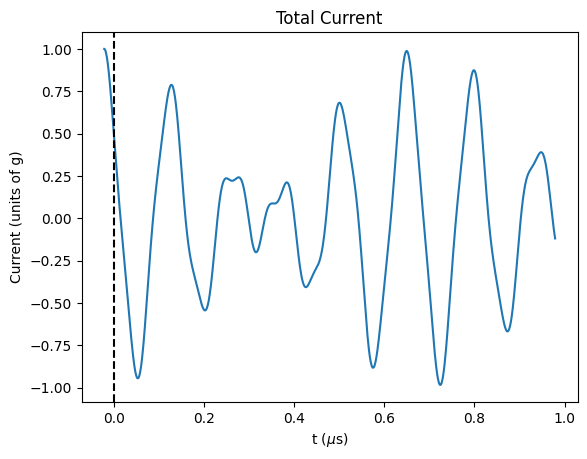

In [376]:
for i in range(num_qubits):
    plt.plot(times, result.expect[i], label=f'Q{i}')
    
plt.xlabel('t ($\mu$s)')
plt.ylabel('Population')

plt.title('Qubit Populations')

plt.legend()
plt.show()

population_difference1 = result.expect[0] - result.expect[1]
population_difference2 = result.expect[1] - result.expect[2]
population_difference3 = result.expect[2] - result.expect[3]

plt.plot(times, population_difference1, label='Leg 1')
plt.plot(times, population_difference2, label='Leg 2')
plt.plot(times, population_difference3, label='Leg 3')


plt.xlabel('t ($\mu$s)')
plt.ylabel('Population difference')

plt.legend()

plt.title('Differences')

plt.show()

beam_splitter_time = np.pi/(4*g)
total_current = (population_difference1 + population_difference2 + population_difference3)

plt.plot(times - beam_splitter_time, total_current)

plt.xlabel('t ($\mu$s)')
plt.ylabel('Current (units of g)')

plt.axvline(0, color='black', linestyle='dashed')

plt.title('Total Current')

plt.show()

In [43]:
num_qubits = 5

H = np.diag(np.ones(num_qubits-1), 1) + np.diag(np.ones(num_qubits-1), -1)

eigenvalues, eigenvectors = np.linalg.eig(H)

# sort by eigenvalues
sorted_indices = np.argsort(eigenvalues)
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

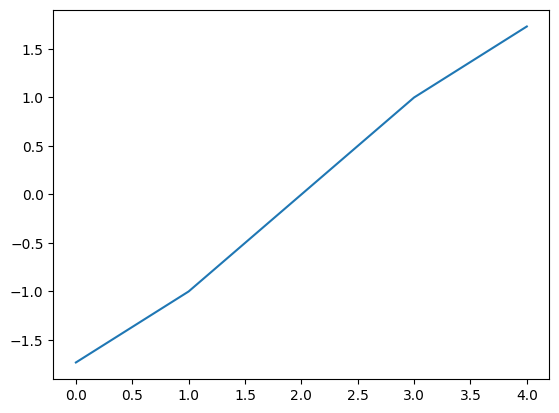

In [44]:
plt.plot(eigenvalues)

[-0.29  0.5  -0.58  0.5  -0.29]
[-0.5  0.5 -0.  -0.5  0.5]
[ 0.58 -0.   -0.58  0.    0.58]
[-0.5 -0.5 -0.   0.5  0.5]
[0.29 0.5  0.58 0.5  0.29]


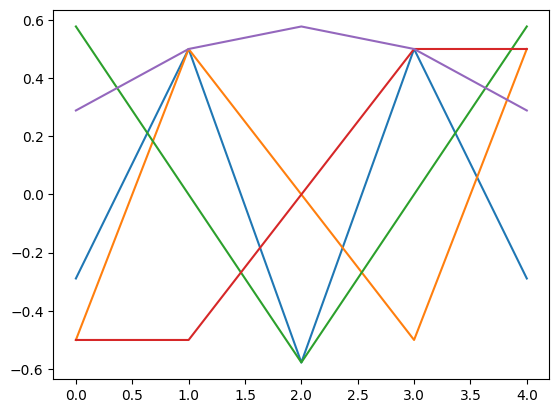

In [45]:
for i in range(num_qubits):
    plt.plot(eigenvectors[:,i])
    print(np.round(eigenvectors[:, i], 2))

In [50]:
max_num_qubits = 10

num_qubits_to_difference_dict = {}

for i in range(2, max_num_qubits):
    
    H = np.diag(np.ones(i-1), 1) + np.diag(np.ones(i-1), -1)

    eigenvalues, eigenvectors = np.linalg.eig(H)

    # sort by eigenvalues
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]
    
    for j in range(i):
        print(np.round(eigenvectors[:, j], 2))    

    num_qubits_to_difference_dict[i] = np.array([eigenvectors[1,j] - eigenvectors[0,j] for j in range(i)])
    
        
    print()

[-0.71  0.71]
[0.71 0.71]

[ 0.5  -0.71  0.5 ]
[ 0.71  0.   -0.71]
[0.5  0.71 0.5 ]

[ 0.37 -0.6   0.6  -0.37]
[ 0.6  -0.37 -0.37  0.6 ]
[-0.6  -0.37  0.37  0.6 ]
[-0.37 -0.6  -0.6  -0.37]

[-0.29  0.5  -0.58  0.5  -0.29]
[-0.5  0.5 -0.  -0.5  0.5]
[ 0.58 -0.   -0.58  0.    0.58]
[-0.5 -0.5 -0.   0.5  0.5]
[0.29 0.5  0.58 0.5  0.29]

[-0.23  0.42 -0.52  0.52 -0.42  0.23]
[-0.42  0.52 -0.23 -0.23  0.52 -0.42]
[-0.52  0.23  0.42 -0.42 -0.23  0.52]
[ 0.52  0.23 -0.42 -0.42  0.23  0.52]
[-0.42 -0.52 -0.23  0.23  0.52  0.42]
[-0.23 -0.42 -0.52 -0.52 -0.42 -0.23]

[-0.19  0.35 -0.46  0.5  -0.46  0.35 -0.19]
[-0.35  0.5  -0.35  0.    0.35 -0.5   0.35]
[ 0.46 -0.35 -0.19  0.5  -0.19 -0.35  0.46]
[-0.5  0.   0.5 -0.  -0.5 -0.   0.5]
[ 0.46  0.35 -0.19 -0.5  -0.19  0.35  0.46]
[ 0.35  0.5   0.35 -0.   -0.35 -0.5  -0.35]
[-0.19 -0.35 -0.46 -0.5  -0.46 -0.35 -0.19]

[ 0.16 -0.3   0.41 -0.46  0.46 -0.41  0.3  -0.16]
[ 0.3  -0.46  0.41 -0.16 -0.16  0.41 -0.46  0.3 ]
[-0.41  0.41 -0.   -0.41  0.41  0

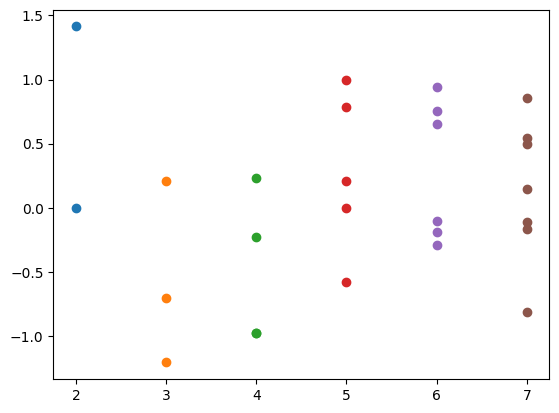

In [54]:
for i in range(2, len(num_qubits_to_difference_dict)):
    plt.scatter(np.ones(i)*i, num_qubits_to_difference_dict[i])